# Hypothesis_Tests_and_IC using Bootstrapping

In [57]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Specify relative path to the file
file_path = "../database/CreditCard_CLEANED.csv"

# Load data into a pandas DataFrame
df = pd.read_csv(file_path)


In [58]:
df["Total Charges"] = pd.to_numeric(data["Total Charges"], errors='coerce')

In [59]:
data=df.copy()

# H0: não existe diferença estística entre os valores dos clientes ativos e inativos quanto ao valor de cobrança mensal
# H1: existe diferença estatisticamente relevante

Clientes Ativos: IC -> (60.38, 62.09)
Clientes Cancelados: IC -> (73.37, 75.51)


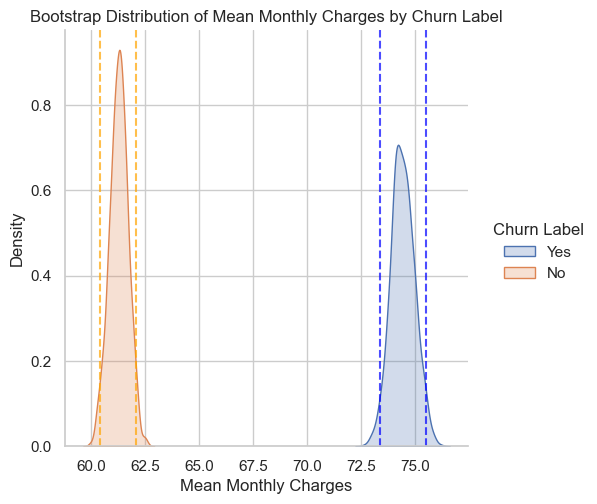

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style='whitegrid')

# Define the number of bootstrap iterations
n_boot = 1000

# Define the confidence interval
ci = 95

# Separate the data into Churn Label "Yes" and "No" groups
yes_data = data[data["Churn Label"] == "Yes"]["Monthly Charges"]
no_data = data[data["Churn Label"] == "No"]["Monthly Charges"]

# Bootstrap the means of each group
yes_means = [np.mean(np.random.choice(yes_data, len(yes_data), replace=True)) for _ in range(n_boot)]
no_means = [np.mean(np.random.choice(no_data, len(no_data), replace=True)) for _ in range(n_boot)]

# Calculate the confidence intervals for each group
yes_ci_low, yes_ci_high = np.percentile(yes_means, [(100-ci)/2, 100-(100-ci)/2])
no_ci_low, no_ci_high = np.percentile(no_means, [(100-ci)/2, 100-(100-ci)/2])

# Combine the bootstrapped means into a DataFrame
bootstrapped_means = pd.DataFrame({"Churn Label": ["Yes"] * n_boot + ["No"] * n_boot, "Monthly Charges": yes_means + no_means})

# Create a displot with the bootstrapped means and fill the area within the confidence interval
g = sns.displot(
    data=bootstrapped_means,
    x="Monthly Charges",
    hue="Churn Label",
    kind="kde",
    common_norm=False,
    fill=True,
)

# Add vertical lines for the confidence intervals
plt.axvline(yes_ci_low, color='blue', linestyle='--', alpha=0.7)
plt.axvline(yes_ci_high, color='blue', linestyle='--', alpha=0.7)
plt.axvline(no_ci_low, color='orange', linestyle='--', alpha=0.7)
plt.axvline(no_ci_high, color='orange', linestyle='--', alpha=0.7)

# Set the labels for the X and Y axes
g.set_axis_labels("Mean Monthly Charges", "Density")

# Set the title for the plot
plt.title("Bootstrap Distribution of Mean Monthly Charges by Churn Label")
# Create a DataFrame for the confidence intervals
print(f"Clientes Ativos: IC -> ({no_ci_low:.2f}, {no_ci_high:.2f})")
print(f"Clientes Cancelados: IC -> ({yes_ci_low:.2f}, {yes_ci_high:.2f})")


# H0 rejeitada! (implicações discutidas no relatório)


QUANTO AO CLTV (Score interno da empresa que mede importancia de cada cliente):

# H0: não existe diferença estística entre os valores dos clientes ativos e inativos
# H1: existe diferença estatisticamente relevante

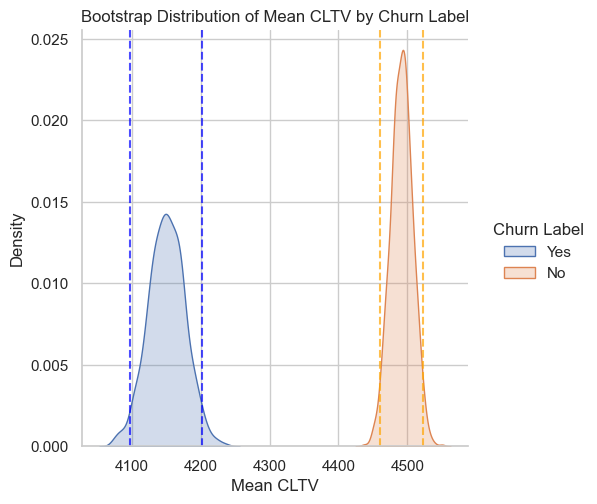

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style='whitegrid')

# Define the number of bootstrap iterations
n_boot = 1000

# Define the confidence interval
ci = 95

# Separate the data into Churn Label "Yes" and "No" groups
yes_data = data[data["Churn Label"] == "Yes"]["CLTV"]
no_data = data[data["Churn Label"] == "No"]["CLTV"]

# Bootstrap the means of each group
yes_means = [np.mean(np.random.choice(yes_data, len(yes_data), replace=True)) for _ in range(n_boot)]
no_means = [np.mean(np.random.choice(no_data, len(no_data), replace=True)) for _ in range(n_boot)]

# Calculate the confidence intervals for each group
yes_ci_low, yes_ci_high = np.percentile(yes_means, [(100-ci)/2, 100-(100-ci)/2])
no_ci_low, no_ci_high = np.percentile(no_means, [(100-ci)/2, 100-(100-ci)/2])

# Combine the bootstrapped means into a DataFrame
bootstrapped_means = pd.DataFrame({"Churn Label": ["Yes"] * n_boot + ["No"] * n_boot, "CLTV": yes_means + no_means})

# Create a displot with the bootstrapped means and fill the area within the confidence interval
g = sns.displot(
    data=bootstrapped_means,
    x="CLTV",
    hue="Churn Label",
    kind="kde",
    common_norm=False,
    fill=True,
)

# Add vertical lines for the confidence intervals
plt.axvline(yes_ci_low, color='blue', linestyle='--', alpha=0.7)
plt.axvline(yes_ci_high, color='blue', linestyle='--', alpha=0.7)
plt.axvline(no_ci_low, color='orange', linestyle='--', alpha=0.7)
plt.axvline(no_ci_high, color='orange', linestyle='--', alpha=0.7)

# Set the labels for the X and Y axes
g.set_axis_labels("Mean CLTV", "Density")

# Set the title for the plot
plt.title("Bootstrap Distribution of Mean CLTV by Churn Label")

# Show the plot
plt.show()



# H0: não existe diferença estística entre os valores dos clientes ativos e inativos
# H1: existe diferença estatisticamente relevante

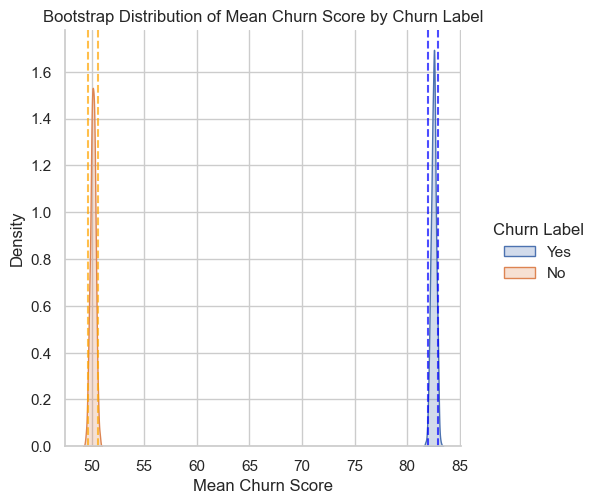

Clientes Ativos: IC -> (49.60, 50.57)
Clientes Cancelados: IC -> (82.03, 82.96)


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style='whitegrid')

# Define the number of bootstrap iterations
n_boot = 1000

# Define the confidence interval
ci = 95

# Separate the data into Churn Label "Yes" and "No" groups
yes_data = data[data["Churn Label"] == "Yes"]["Churn Score"]
no_data = data[data["Churn Label"] == "No"]["Churn Score"]

# Bootstrap the means of each group
yes_means = [np.mean(np.random.choice(yes_data, len(yes_data), replace=True)) for _ in range(n_boot)]
no_means = [np.mean(np.random.choice(no_data, len(no_data), replace=True)) for _ in range(n_boot)]

# Calculate the confidence intervals for each group
yes_ci_low, yes_ci_high = np.percentile(yes_means, [(100-ci)/2, 100-(100-ci)/2])
no_ci_low, no_ci_high = np.percentile(no_means, [(100-ci)/2, 100-(100-ci)/2])

# Combine the bootstrapped means into a DataFrame
bootstrapped_means = pd.DataFrame({"Churn Label": ["Yes"] * n_boot + ["No"] * n_boot, "Churn Score": yes_means + no_means})

# Create a displot with the bootstrapped means and fill the area within the confidence interval
g = sns.displot(
    data=bootstrapped_means,
    x="Churn Score",
    hue="Churn Label",
    kind="kde",
    common_norm=False,
    fill=True,
)

# Add vertical lines for the confidence intervals
plt.axvline(yes_ci_low, color='blue', linestyle='--', alpha=0.7)
plt.axvline(yes_ci_high, color='blue', linestyle='--', alpha=0.7)
plt.axvline(no_ci_low, color='orange', linestyle='--', alpha=0.7)
plt.axvline(no_ci_high, color='orange', linestyle='--', alpha=0.7)

# Set the labels for the X and Y axes
g.set_axis_labels("Mean Churn Score", "Density")

# Set the title for the plot
plt.title("Bootstrap Distribution of Mean Churn Score by Churn Label")

# Show the plot
plt.show()
# Create a DataFrame for the confidence intervals
print(f"Clientes Ativos: IC -> ({no_ci_low:.2f}, {no_ci_high:.2f})")
print(f"Clientes Cancelados: IC -> ({yes_ci_low:.2f}, {yes_ci_high:.2f})")


# H0 rejeitada! (implicações discutidas no relatório)


# Quanto a cobrança total:  

# H0: não existe diferença estística entre os valores dos clientes ativos e inativos
# H1: existe diferença estatisticamente relevante

Text(0.5, 1.0, 'Bootstrap Distribution of Mean Total Charges by Churn Label')

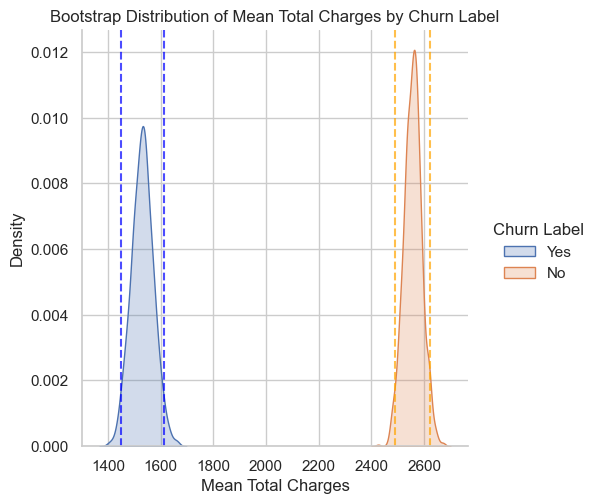

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style='whitegrid')
# Convert "Total Charges" to numeric, invalid parsing will be set as NaN
data["Total Charges"] = pd.to_numeric(data["Total Charges"], errors='coerce')

# Drop rows with NaN values in "Total Charges"
data = data.dropna(subset=["Total Charges"])

# Define the number of bootstrap iterations
n_boot = 1000

# Define the confidence interval
ci = 95

# Separate the data into Churn Label "Yes" and "No" groups
yes_data = data[data["Churn Label"] == "Yes"]["Total Charges"]
no_data = data[data["Churn Label"] == "No"]["Total Charges"]

# Bootstrap the means of each group
yes_means = [np.mean(np.random.choice(yes_data, len(yes_data), replace=True)) for _ in range(n_boot)]
no_means = [np.mean(np.random.choice(no_data, len(no_data), replace=True)) for _ in range(n_boot)]

# Calculate the confidence intervals for each group
yes_ci_low, yes_ci_high = np.percentile(yes_means, [(100-ci)/2, 100-(100-ci)/2])
no_ci_low, no_ci_high = np.percentile(no_means, [(100-ci)/2, 100-(100-ci)/2])

# Combine the bootstrapped means into a DataFrame
bootstrapped_means = pd.DataFrame({"Churn Label": ["Yes"] * n_boot + ["No"] * n_boot, "Total Charges": yes_means + no_means})

# Create a displot with the bootstrapped means and fill the area within the confidence interval
g = sns.displot(
    data=bootstrapped_means,
    x="Total Charges",
    hue="Churn Label",
    kind="kde",
    common_norm=False,
    fill=True,
)

# Add vertical lines for the confidence intervals
plt.axvline(yes_ci_low, color='blue', linestyle='--', alpha=0.7)
plt.axvline(yes_ci_high, color='blue', linestyle='--', alpha=0.7)
plt.axvline(no_ci_low, color='orange', linestyle='--', alpha=0.7)
plt.axvline(no_ci_high, color='orange', linestyle='--', alpha=0.7)

# Set the labels for the X and Y axes
g.set_axis_labels("Mean Total Charges", "Density")

# Set the title for the plot
plt.title("Bootstrap Distribution of Mean Total Charges by Churn Label")

# Show the plo


# H0 rejeitada! (implicações discutidas no relatório)

In [43]:
data=df[['Total Charges', 'Monthly Charges', 'CLTV', 'Churn Score', 'Churn Value']].copy()

In [44]:
data['time_estimation'] = data['Total Charges']/data['Monthly Charges']

In [45]:
data.corr()

,Total Charges,Monthly Charges,CLTV,Churn Score,Churn Value,time_estimation
Total Charges,1.000000,0.651065,0.341837,-0.124312,-0.199484,0.826161
Monthly Charges,0.651065,1.000000,0.098693,0.133754,0.193356,0.246502
CLTV,0.341837,0.098693,1.000000,-0.079782,-0.127463,0.395997
Churn Score,-0.124312,0.133754,-0.079782,1.000000,0.664897,-0.226073
Churn Value,-0.199484,0.193356,-0.127463,0.664897,1.000000,-0.353775
time_estimation,0.826161,0.246502,0.395997,-0.226073,-0.353775,1.000000


In [71]:
oi= df[['Churn Score','Churn Value']].copy()

In [75]:
oi = df[['Churn Score','Churn Value']].copy()
ola=np.array(oi[oi['Churn Value'] == 1]['Churn Score'])


In [82]:
(ola.std()/np.sqrt(len(ola)))

0.23884675077812073